In [316]:
## import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, learning_curve
from sklearn import metrics, svm

from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn import metrics, svm
from sklearn.tree import DecisionTreeClassifier


from sklearn.svm import SVC


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE



In [317]:
## load the dataset
df_1 = pd.read_csv('fraud_log.csv')

In [318]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [319]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [320]:
df_1.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [321]:
df_1.value_counts()

step  type      amount      nameOrig     oldbalanceOrg  newbalanceOrig  nameDest     oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
743   TRANSFER  6311409.28  C1529008245  6311409.28     0.00            C1881841831  0.00            0.00            1        0                 1
1     CASH_IN   270.78      C619985571   4184966.65     4185237.43      C875917495   3019.00         0.00            0        0                 1
                484.57      C1859216983  5422437.76     5422922.33      C657736958   5638778.53      5579568.65      0        0                 1
                783.31      C1585711807  8150331.93     8151115.24      C284686302   2013.12         1229.81         0        0                 1
                863.08      C1554118033  9290756.54     9291619.62      C5592464     5577.88         4714.80         0        0                 1
                                                                                                                                 

In [322]:
df_1['type'].value_counts()


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [323]:
# Calculate actual numbers instead of percentages
fraud_counts = df_1['isFraud'].value_counts()
flagged_counts = df_1['isFlaggedFraud'].value_counts()
fraud_counts



isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [324]:
## look at how many are flagged
flagged_counts

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

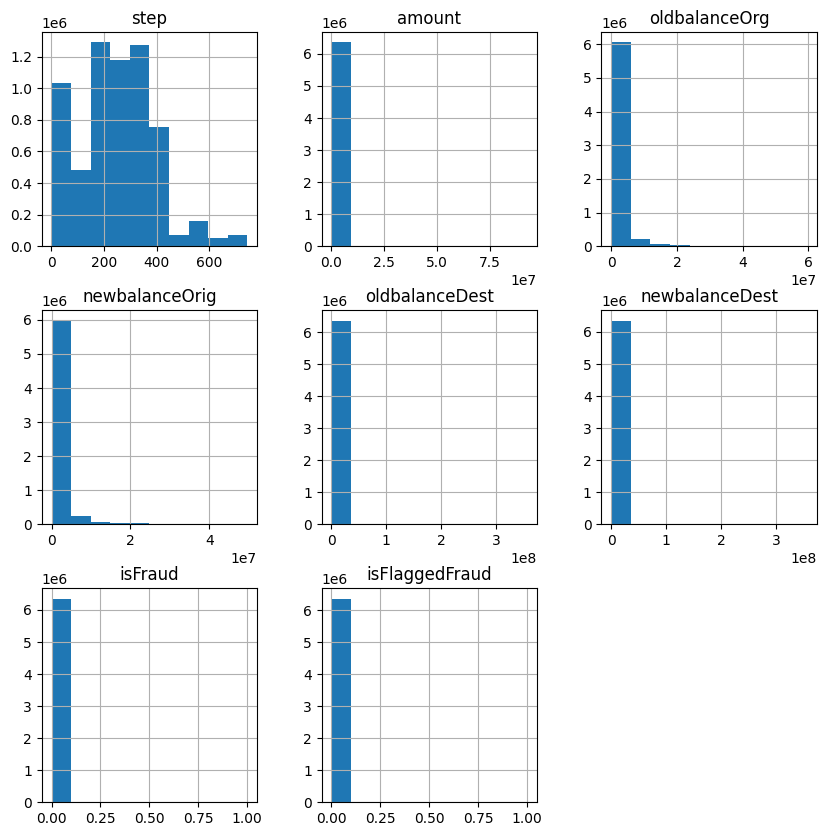

In [325]:
## histogram
df_1.hist(bins=10, figsize=(10,10))
plt.show()

In [326]:
## check the unique values to decide on encoding 
df_1.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [327]:
## Preprocessing 
# Use Label encoder for the type of payment
encoder = LabelEncoder()
df_1['type_enc'] =encoder.fit_transform(df_1['type'])

In [328]:
## Look at the labels
label_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}


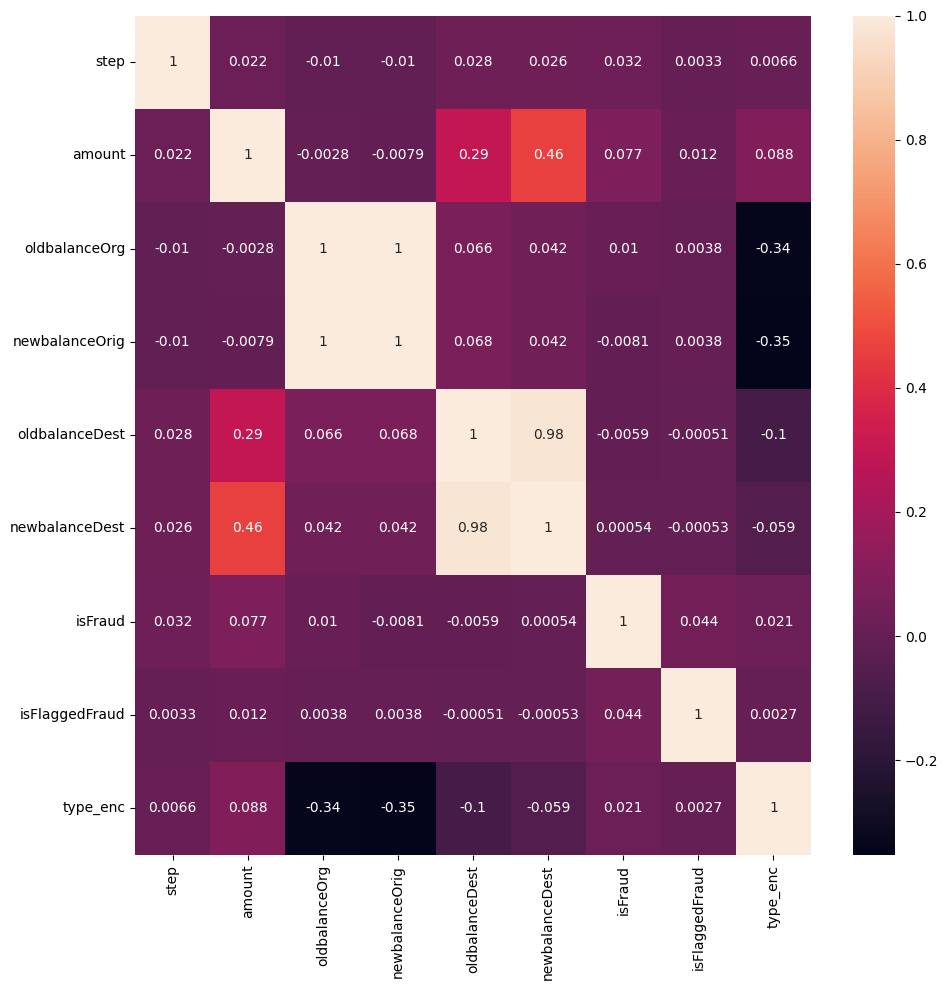

In [329]:
## look at a correlation matrix of the numeric data
numeric_data = df_1.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10,10))
corr_mat = numeric_data.corr()
sns.heatmap(corr_mat, annot=True)
plt.tight_layout()
plt.show()

In [330]:
## Drop the is fraud, type, isFlaggedFraud,nameOrig, nameDest
df_2 = df_1.drop(['type','isFraud','isFlaggedFraud','nameOrig','nameDest'], axis=1) ## dropped is Fraud, nameOrig, nameDest column

In [331]:
## Look at the new dataset 
df_2.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_enc
0,1,9839.64,170136.0,160296.36,0.0,0.0,3
1,1,1864.28,21249.0,19384.72,0.0,0.0,3
2,1,181.00,181.0,0.00,0.0,0.0,4
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,3


In [332]:
# Create fraud-only dataset to create visualisations/smaller more workable dataset
fraud_df = df_1[df_1['isFraud'] == 1].copy()
## dropped is Fraud column
fraud_df = fraud_df.drop(['isFraud', 'nameOrig','nameDest'], axis=1) 

In [333]:
fraud_df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,8213.0,3.684139e+02,2.163887e+02,1.0,181.00,367.00,558.00,7.430000e+02
amount,8213.0,1.467967e+06,2.404253e+06,0.0,127091.33,441423.44,1517771.48,1.000000e+07
oldbalanceOrg,8213.0,1.649668e+06,3.547719e+06,0.0,125822.44,438983.45,1517771.48,5.958504e+07
newbalanceOrig,8213.0,1.923926e+05,1.965666e+06,0.0,0.00,0.00,0.00,4.958504e+07
oldbalanceDest,8213.0,5.442496e+05,3.336421e+06,0.0,0.00,0.00,147828.66,2.362305e+08
newbalanceDest,8213.0,1.279708e+06,3.908817e+06,0.0,0.00,4676.42,1058725.22,2.367265e+08
isFlaggedFraud,8213.0,1.948131e-03,4.409731e-02,0.0,0.00,0.00,0.00,1.000000e+00
type_enc,8213.0,2.496530e+00,1.500087e+00,1.0,1.00,1.00,4.00,4.000000e+00


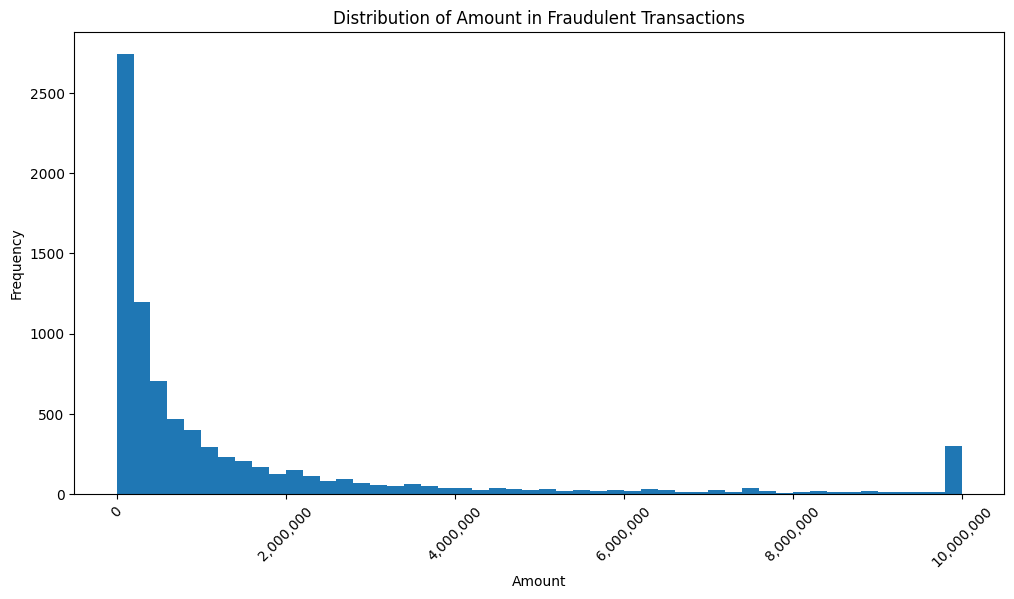

Amount Statistics in Fraudulent Transactions:
Min amount: 0.00
Max amount: 10,000,000.00
Mean amount: 1,467,967.30
Median amount: 441,423.44


In [334]:
# Visualise the fraudulent transactions
plt.figure(figsize=(12, 6))
plt.hist(fraud_df['amount'], bins=50)
plt.title('Distribution of Amount in Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
# Format x-axis to show regular numbers instead of scientific notation
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=45)
plt.show()

# Print basic statistics to confirm
print("Amount Statistics in Fraudulent Transactions:")
print(f"Min amount: {fraud_df['amount'].min():,.2f}")
print(f"Max amount: {fraud_df['amount'].max():,.2f}")
print(f"Mean amount: {fraud_df['amount'].mean():,.2f}")
print(f"Median amount: {fraud_df['amount'].median():,.2f}")

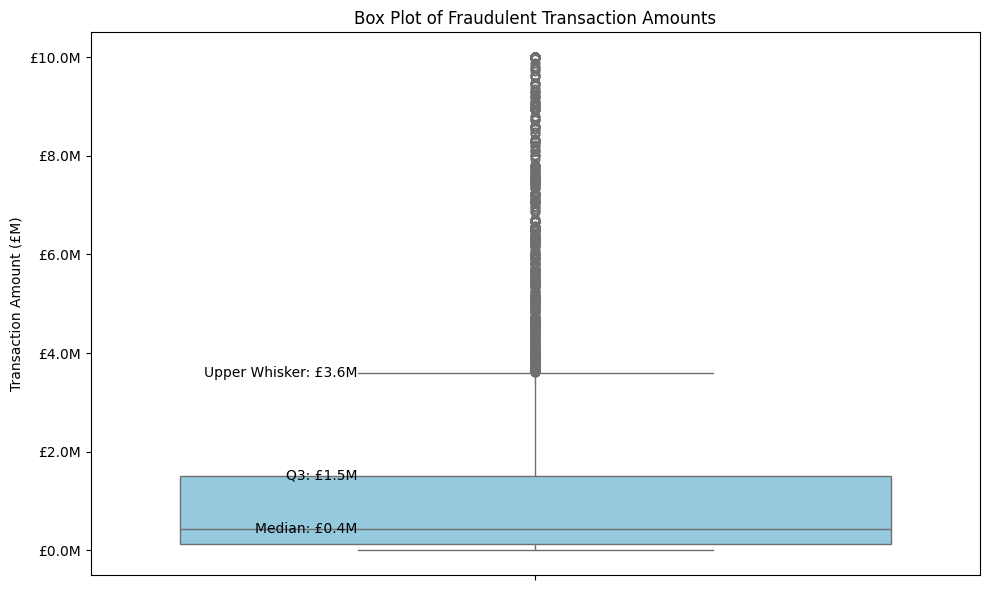

In [335]:
## Create a boxplot to look at the fraudulaent transaction amounts in more detail

plt.figure(figsize=(10, 6))
box = sns.boxplot(y=fraud_df['amount'], color='skyblue')
plt.title('Box Plot of Fraudulent Transaction Amounts')
plt.ylabel('Transaction Amount (£M)')

# Calculate statistics
Q1 = fraud_df['amount'].quantile(0.25)
Q3 = fraud_df['amount'].quantile(0.75)
median = fraud_df['amount'].median()
IQR = Q3 - Q1
upper_whisker = fraud_df['amount'][fraud_df['amount'] <= (Q3 + 1.5 * IQR)].max()

# Add labels directly on the plot
plt.text(-0.2, median, f'Median: £0.4M', 
         horizontalalignment='right', 
         verticalalignment='center')

plt.text(-0.2, Q3, f'Q3: £1.5M', 
         horizontalalignment='right', 
         verticalalignment='center')

plt.text(-0.2, upper_whisker, f'Upper Whisker: £3.6M', 
         horizontalalignment='right', 
         verticalalignment='center')

# Format y-axis in millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x/1000000:.1f}M'))

plt.tight_layout()
plt.show()





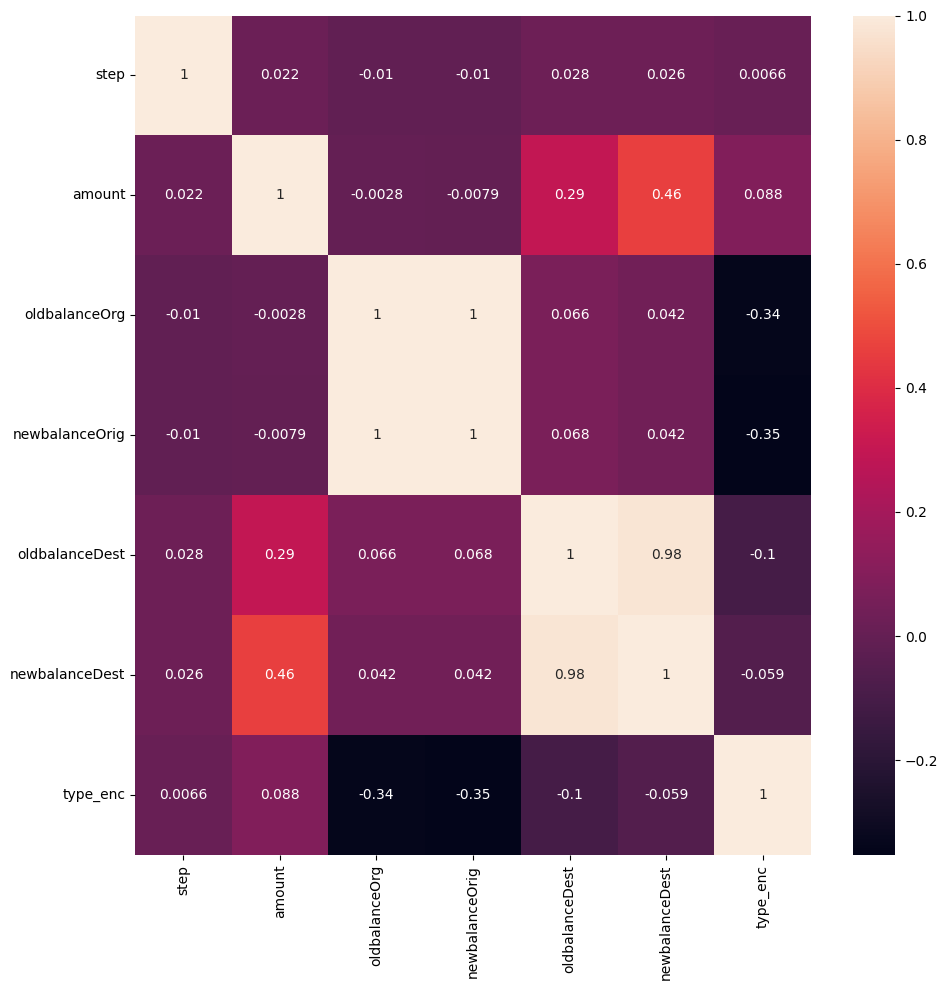

In [336]:
## Correlation matrix
plt.figure(figsize=(10,10))
corr_mat = df_2.corr()
sns.heatmap(corr_mat, annot=True)
plt.tight_layout()
plt.show()

In [337]:
## The different types of transactions that are a fraud
fraud_df['type'].value_counts()




type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

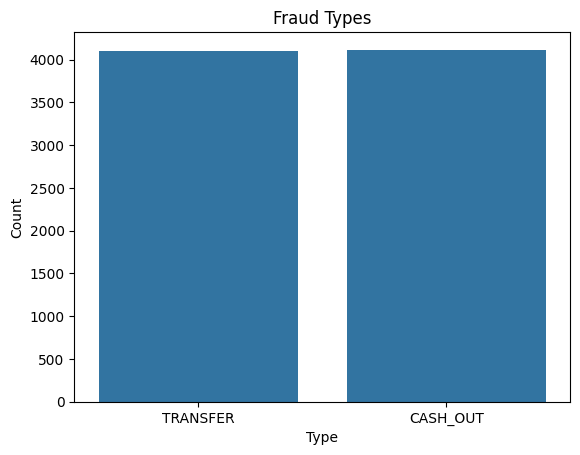

In [338]:
## Visualise the different types
plt.figure
sns.countplot(x='type', data=fraud_df)
plt.title('Fraud Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [339]:
# Look at zero-amount fraud transactions in detail
zero_fraud = fraud_df[fraud_df['amount'] == 0]
print("Number of zero-amount fraudulent transactions:", len(zero_fraud))

Number of zero-amount fraudulent transactions: 16


In [340]:
##Check if these are the flagged frauds that where stopped
flagged_zero_fraud = zero_fraud[zero_fraud['isFlaggedFraud'] == 1]
print(flagged_zero_fraud)

Empty DataFrame
Columns: [step, type, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, isFlaggedFraud, type_enc]
Index: []


In [341]:
## make datasets where flags where flagged and were not
flagged_frauds = fraud_df[fraud_df['isFlaggedFraud'] == 1]

not_flagged_frauds = fraud_df[fraud_df['isFlaggedFraud'] == 0]

In [342]:
flagged_frauds.describe().T

,count,mean,std,min,25%,50%,75%,max
step,16.0,5.375625e+02,1.818952e+02,212.00,4.155000e+02,601.500,6.787500e+02,741.00
amount,16.0,4.861598e+06,3.572499e+06,353874.22,2.242749e+06,4234245.095,7.883451e+06,10000000.00
oldbalanceOrg,16.0,7.817869e+06,6.972669e+06,353874.22,3.013980e+06,4923043.085,1.212835e+07,19585040.37
newbalanceOrig,16.0,7.817869e+06,6.972669e+06,353874.22,3.013980e+06,4923043.085,1.212835e+07,19585040.37
oldbalanceDest,16.0,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000,0.000000e+00,0.00
newbalanceDest,16.0,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000,0.000000e+00,0.00
isFlaggedFraud,16.0,1.000000e+00,0.000000e+00,1.00,1.000000e+00,1.000,1.000000e+00,1.00
type_enc,16.0,4.000000e+00,0.000000e+00,4.00,4.000000e+00,4.000,4.000000e+00,4.00


In [343]:
not_flagged_frauds.describe().T

,count,mean,std,min,25%,50%,75%,max
step,8197.0,3.680837e+02,2.163307e+02,1.0,181.00,367.00,558.00,7.430000e+02
amount,8197.0,1.461343e+06,2.397047e+06,0.0,126848.63,438983.45,1504870.33,1.000000e+07
oldbalanceOrg,8197.0,1.637628e+06,3.528100e+06,0.0,125464.42,438224.60,1504870.33,5.958504e+07
newbalanceOrig,8197.0,1.775082e+05,1.915378e+06,0.0,0.00,0.00,0.00,4.958504e+07
oldbalanceDest,8197.0,5.453120e+05,3.339589e+06,0.0,0.00,0.00,148038.26,2.362305e+08
newbalanceDest,8197.0,1.282206e+06,3.912221e+06,0.0,0.00,7466.12,1062664.96,2.367265e+08
isFlaggedFraud,8197.0,0.000000e+00,0.000000e+00,0.0,0.00,0.00,0.00,0.000000e+00
type_enc,8197.0,2.493595e+00,1.500078e+00,1.0,1.00,1.00,4.00,4.000000e+00


In [344]:
# Now look at the none fraud dataset
# Count zeros in newbalanceDest
zero_balance_count = not_flagged_frauds['newbalanceDest'].value_counts()[0]
print(f"Number of frauds with zero destination balance: {zero_balance_count}")

Number of frauds with zero destination balance: 4075


In [345]:
# Group by both isFraud and newbalanceDest being zero
fraud_zero_balance = df_1.groupby(['isFraud', df_1['newbalanceDest'] == 0]).size()
print("Grouping by Fraud and Zero Balance:")
print(fraud_zero_balance)

Grouping by Fraud and Zero Balance:
isFraud  newbalanceDest
0        False             3919065
         True              2435342
1        False                4122
         True                 4091
dtype: int64


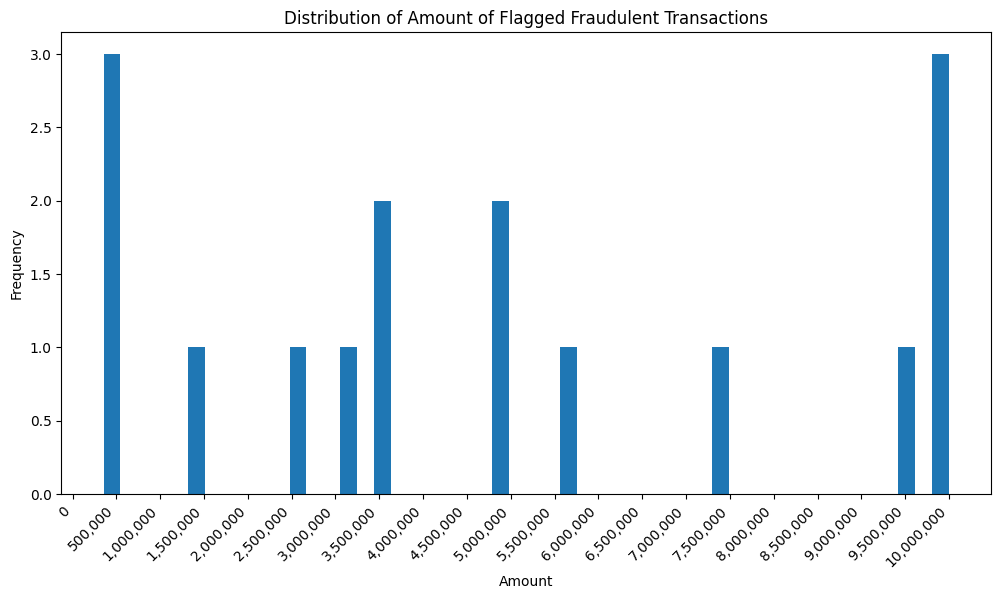

In [346]:
## Visualise the flagged frauds
plt.figure(figsize=(12, 6))
plt.hist(flagged_frauds['amount'], bins=50)
plt.title('Distribution of Amount of Flagged Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
# Format x-axis to show regular numbers instead of scientific notation
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(np.arange(0, 10500000, 500000), rotation=45, ha='right')
plt.show()

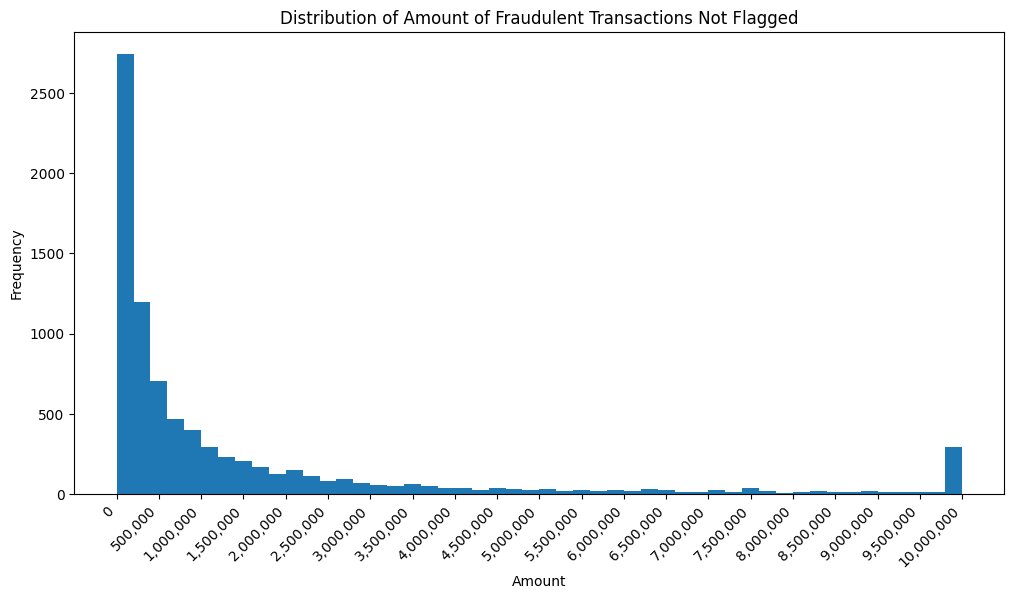

In [347]:
## Visualise the not flagged frauds
plt.figure(figsize=(12, 6))
plt.hist(not_flagged_frauds['amount'], bins=50)
plt.title('Distribution of Amount of Fraudulent Transactions Not Flagged')
plt.xlabel('Amount')
plt.ylabel('Frequency')
# Format x-axis to show regular numbers instead of scientific notation
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(np.arange(0, 10500000, 500000), rotation=45, ha='right')

plt.show()

In [348]:
# Look at zero-amount fraud transactions in detail
zero_fraud = fraud_df[fraud_df['amount'] == 0]
print("Number of zero-amount fraudulent transactions:", len(zero_fraud))

# Look at other characteristics of these transactions
print("\nDetails of zero-amount fraudulent transactions:")
print(zero_fraud[['type', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].head())

# Compare balances before and after
print("\nBalance changes in zero-amount fraudulent transactions:")
zero_fraud['orig_balance_change'] = zero_fraud['newbalanceOrig'] - zero_fraud['oldbalanceOrg']
zero_fraud['dest_balance_change'] = zero_fraud['newbalanceDest'] - zero_fraud['oldbalanceDest']
print(zero_fraud[['orig_balance_change', 'dest_balance_change']].describe())

Number of zero-amount fraudulent transactions: 16

Details of zero-amount fraudulent transactions:
             type  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
2736447  CASH_OUT            0.0             0.0            0.00   
3247298  CASH_OUT            0.0             0.0            0.00   
3760289  CASH_OUT            0.0             0.0       538547.63   
5563714  CASH_OUT            0.0             0.0      7970766.57   
5996408  CASH_OUT            0.0             0.0        76759.90   

         newbalanceDest  
2736447            0.00  
3247298            0.00  
3760289       538547.63  
5563714      7970766.57  
5996408        76759.90  

Balance changes in zero-amount fraudulent transactions:
       orig_balance_change  dest_balance_change
count                 16.0                 16.0
mean                   0.0                  0.0
std                    0.0                  0.0
min                    0.0                  0.0
25%                    0.0             

C:\Users\lynsk\AppData\Local\Temp\ipykernel_27032\3609039829.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_fraud['orig_balance_change'] = zero_fraud['newbalanceOrig'] - zero_fraud['oldbalanceOrg']
C:\Users\lynsk\AppData\Local\Temp\ipykernel_27032\3609039829.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_fraud['dest_balance_change'] = zero_fraud['newbalanceDest'] - zero_fraud['oldbalanceDest']


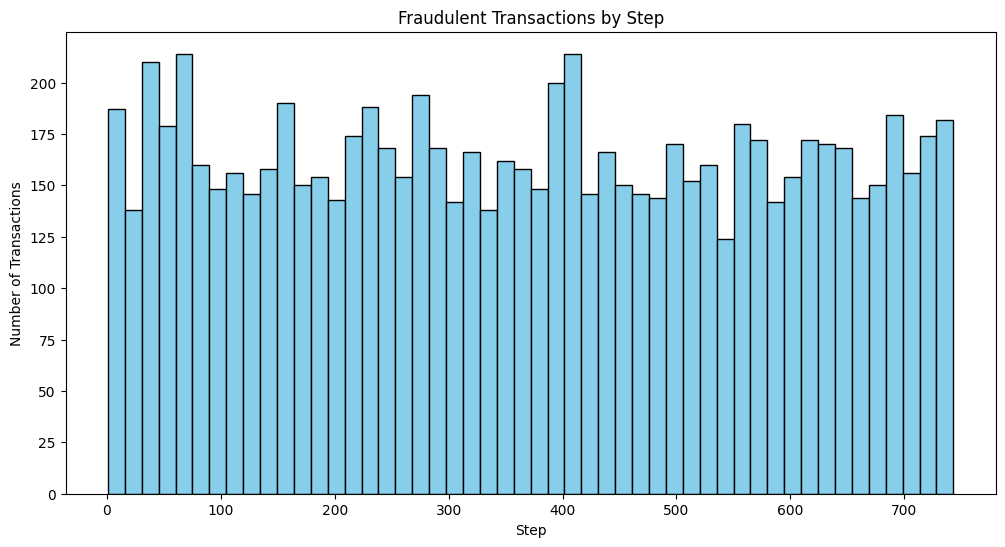

In [349]:
## Visualise teh timing of transactions

plt.figure(figsize=(12, 6))
plt.hist(fraud_df['step'], bins=50, color='skyblue', edgecolor='black')
plt.title('Fraudulent Transactions by Step')
plt.xlabel('Step')
plt.ylabel('Number of Transactions')
plt.show()

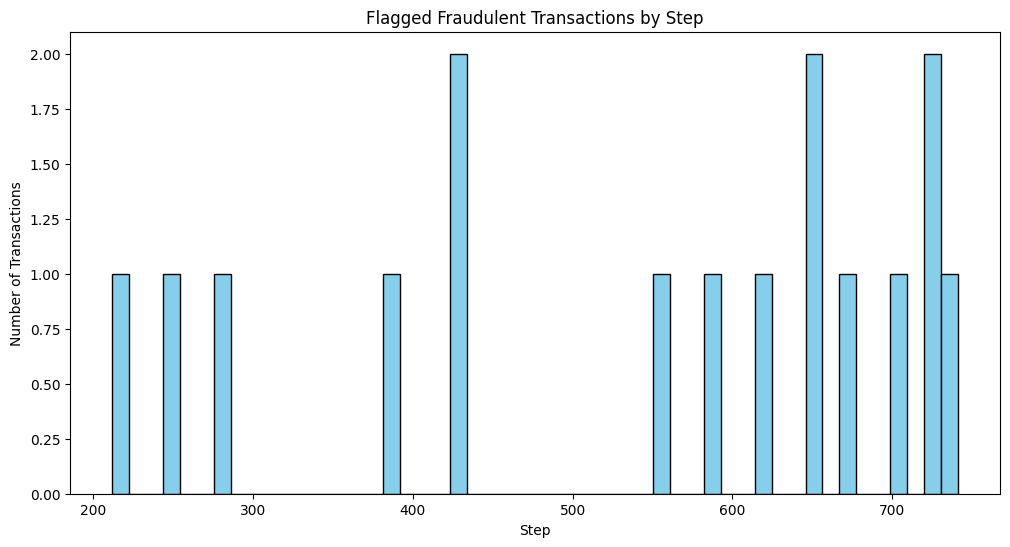

In [350]:
##Visualise when transactions where flagged
plt.figure(figsize=(12, 6))
plt.hist(flagged_frauds['step'], bins=50, color='skyblue', edgecolor='black')
plt.title('Flagged Fraudulent Transactions by Step')
plt.xlabel('Step')
plt.ylabel('Number of Transactions')
plt.show()

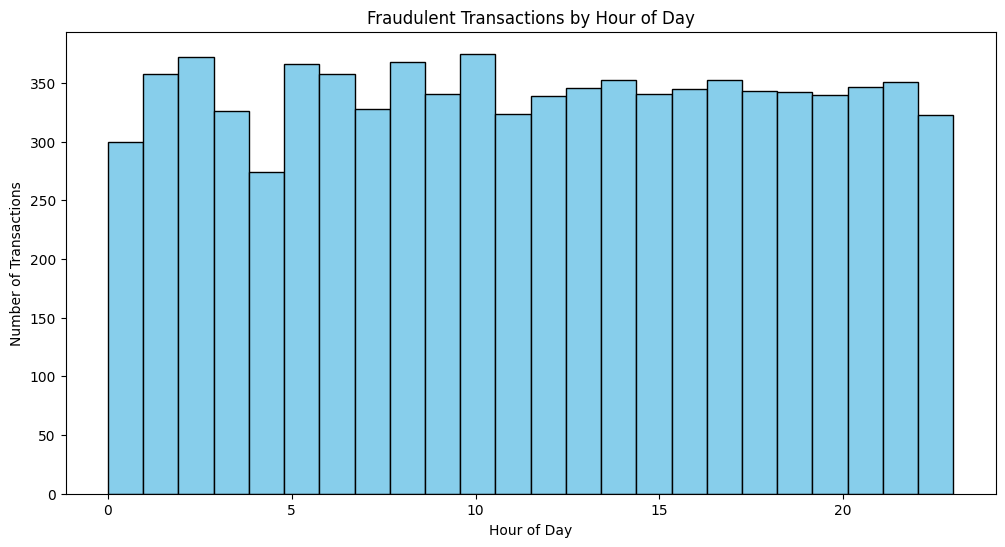

In [351]:
## visualise the transactions by the time of day
fraud_df['hour_of_day'] = fraud_df['step'] % 24

plt.figure(figsize=(12, 6))
plt.hist(fraud_df['hour_of_day'], bins=24, color='skyblue', edgecolor='black')
plt.title('Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()

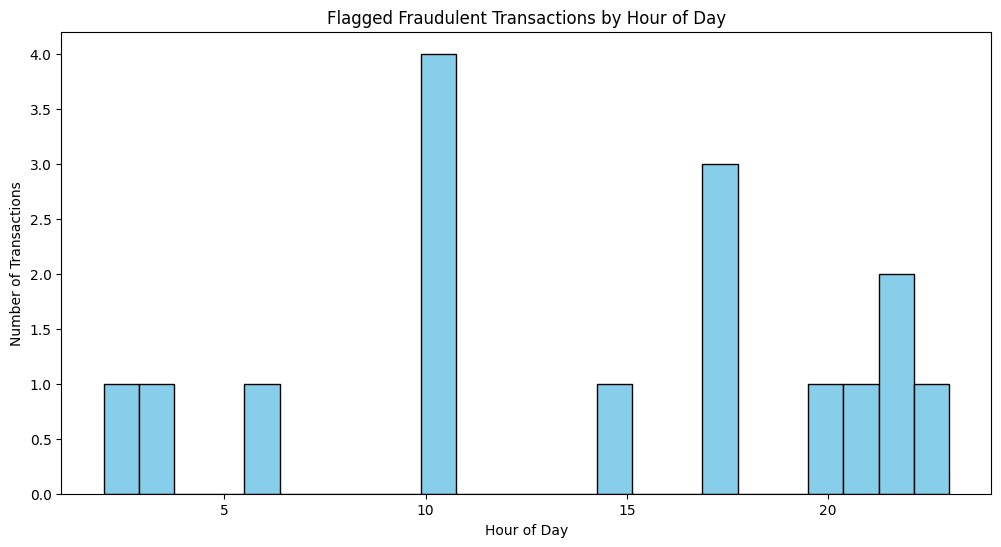

In [352]:
## Visualise the transactions by hour of the day
# Create a copy of the flagged frauds dataframe
flagged_frauds_copy = flagged_frauds.copy()

# Add hour of day column
flagged_frauds_copy.loc[:, 'hour_of_day'] = flagged_frauds_copy['step'] % 24


plt.figure(figsize=(12, 6))
plt.hist(flagged_frauds_copy['hour_of_day'], 
         bins=24, 
         color='skyblue', 
         edgecolor='black')


plt.title('Flagged Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()

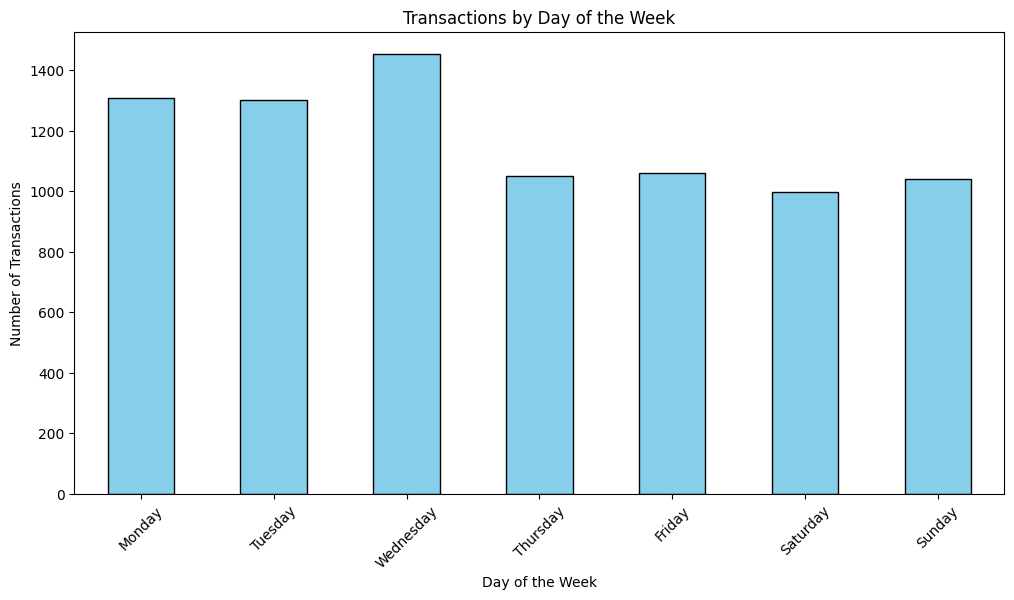

In [353]:
## Look at the transactions by days of the week

# Convert steps to days
fraud_df['day_of_week'] = (fraud_df['step'] // 24) % 7

# Map numbers to weekday names
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
               4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
fraud_df['day_of_week'] = fraud_df['day_of_week'].map(weekday_map)

# Plot
plt.figure(figsize=(12, 6))
fraud_df['day_of_week'].value_counts().reindex(weekday_map.values()).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

In [354]:
# Using .loc to analyze specific aspects of fraud cases
cash_out_frauds = fraud_df.loc[fraud_df['type'] == 'CASH_OUT']
high_value_frauds = fraud_df.loc[fraud_df['amount'] > 2000000]
zero_balance_frauds = fraud_df.loc[fraud_df['oldbalanceOrg'] == 0]

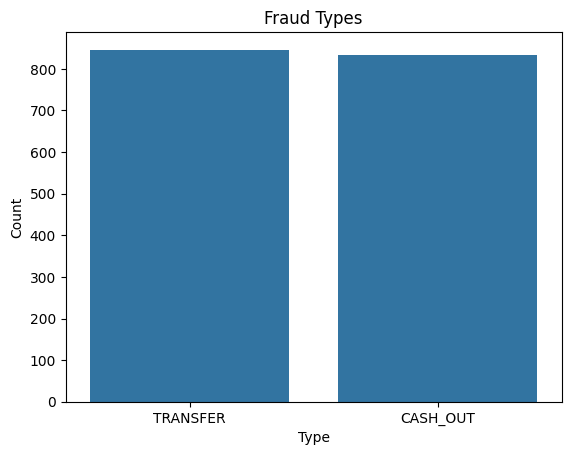

In [355]:
## Visualise the high value fraud types
plt.figure
sns.countplot(x='type', data=high_value_frauds)
plt.title('Fraud Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

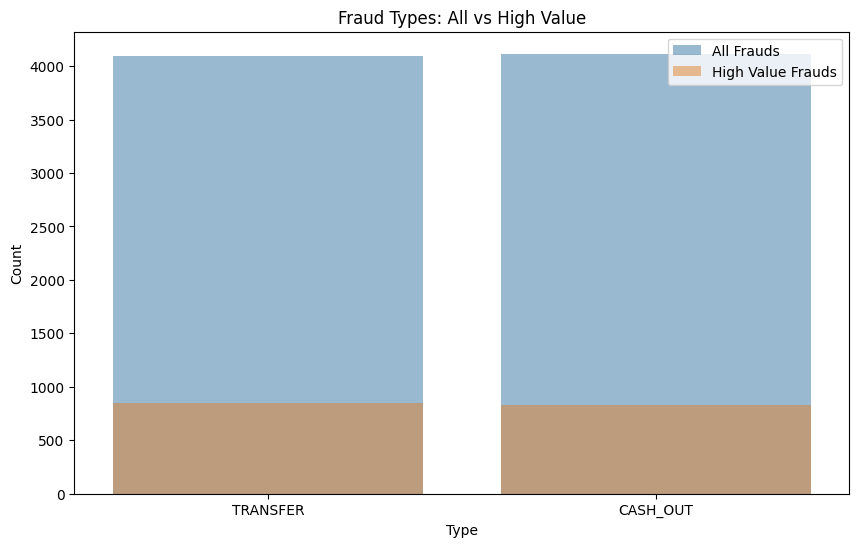

In [356]:
## Visualise types for different transaction values
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=fraud_df, label='All Frauds', alpha=0.5)
sns.countplot(x='type', data=high_value_frauds, label='High Value Frauds', alpha=0.5)

plt.title('Fraud Types: All vs High Value')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend()
plt.show()

In [357]:
cash_out_frauds.describe().T

,count,mean,std,min,25%,50%,75%,max
step,4116.0,3.677204e+02,2.166702e+02,1.0,180.0000,367.000,5.580000e+02,7.430000e+02
amount,4116.0,1.455103e+06,2.393842e+06,0.0,125464.4500,435516.905,1.500761e+06,1.000000e+07
oldbalanceOrg,4116.0,1.453869e+06,2.394506e+06,0.0,123231.0000,433677.745,1.500761e+06,1.000000e+07
newbalanceOrig,4116.0,7.258688e+01,4.656888e+03,0.0,0.0000,0.000,0.000000e+00,2.987676e+05
oldbalanceDest,4116.0,1.084918e+06,4.650482e+06,0.0,0.0000,144970.055,7.947107e+05,2.362305e+08
newbalanceDest,4116.0,2.549545e+06,5.220285e+06,0.0,356281.3275,1050828.200,3.013796e+06,2.367265e+08
isFlaggedFraud,4116.0,0.000000e+00,0.000000e+00,0.0,0.0000,0.000,0.000000e+00,0.000000e+00
type_enc,4116.0,1.000000e+00,0.000000e+00,1.0,1.0000,1.000,1.000000e+00,1.000000e+00
hour_of_day,4116.0,1.155126e+01,6.871679e+00,0.0,6.0000,12.000,1.700000e+01,2.300000e+01


In [358]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   type_enc        int64  
dtypes: float64(5), int64(2)
memory usage: 339.8 MB


# Model 1 - Using Oversampling Technique


In [359]:
## split the data into independent and dependent variable
X = df_2
y = df_1['isFraud']

In [360]:
# split data into train/test split of 70/30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# display the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (4453834, 7)
X_test shape: (1908786, 7)
y_train shape: (4453834,)
y_test shape: (1908786,)


In [361]:
# Create scaler
scaler = StandardScaler()

# Create a copy of the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the scaled training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Check the new class distribution
print("After SMOTE, counts of label '1': {}".format(sum(y_train_balanced == 1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_balanced == 0)))

After SMOTE, counts of label '1': 4448085
After SMOTE, counts of label '0': 4448085


In [362]:
## Look at decision trees
## creating a decision tree classifier
decision_tree_gini = DecisionTreeClassifier()

## using entropy criterion
decision_tree_ent = DecisionTreeClassifier(criterion='entropy')

## use a max depth
decision_tree_depth = DecisionTreeClassifier(max_depth=3)

In [363]:
# fit the trees
decision_tree_gini.fit(X_train_scaled,y_train)
decision_tree_ent.fit(X_train_scaled,y_train)
decision_tree_depth.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

In [364]:
## make prediction for test data
y_pred_gini = decision_tree_gini.predict(X_test_scaled)
y_pred_ent = decision_tree_ent.predict(X_test_scaled)
y_pred_depth = decision_tree_depth.predict(X_test_scaled)

In [365]:
## measure accuracy
print ('Accuracy(gini)',metrics.accuracy_score(y_test, y_pred_gini))
print ('Accuracy(entropy)',metrics.accuracy_score(y_test, y_pred_ent))
print ('Accuracy(depth)',metrics.accuracy_score(y_test, y_pred_depth))

Accuracy(gini) 0.9996751862178369
Accuracy(entropy) 0.999704524236871
Accuracy(depth) 0.9989370207032113


In [366]:
## Value of AUC
print ('AUC(gini)',roc_auc_score(y_test, y_pred_gini))
print ('AUC(entropy)',roc_auc_score(y_test, y_pred_ent))
print ('AUC(depth)',roc_auc_score(y_test, y_pred_depth))


AUC(gini) 0.933364971170363
AUC(entropy) 0.9370275354096228
AUC(depth) 0.5888790832743441


In [367]:
# For each model
models = {
    'Gini': decision_tree_gini,
    'Entropy': decision_tree_ent,
    'Max Depth': decision_tree_depth
}

for name, model in models.items():
    # Get cross-validation scores
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"{name} CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Gini CV Score: 0.9997 (+/- 0.0000)
Entropy CV Score: 0.9997 (+/- 0.0000)
Max Depth CV Score: 0.9990 (+/- 0.0000)


In [368]:
## gini confusion matrix
cm = confusion_matrix(y_test, y_pred_gini)
print(cm)

[[1906030     292]
 [    328    2136]]


In [369]:
## gini scores - precision recall etc
precision = precision_score(y_test, y_pred_gini)
recall = recall_score(y_test, y_pred_gini)
f1 = f1_score(y_test, y_pred_gini)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8797364085667215
Recall: 0.8668831168831169
F1 Score: 0.8732624693376942


## Try Undersampling instead


In [370]:
## Look to create a balance data set by making a frauds only dataset and Non frauds dataset
fraud = df_1[df_1['isFraud'] == 1].copy()
No_fraud = df_1[df_1['isFraud'] == 0].copy()

In [371]:
## Create a smaller sample of non fraud cases
No_fraud_undersample = No_fraud.sample(n=len(fraud), random_state=42)

In [372]:
## Add the undersampled and fraud cases together to create a balanced dataset
balanced_df = pd.concat([fraud,No_fraud_undersample])

## Mix the sets together
balanced_df = balanced_df.sample(frac=1, random_state=42)

In [373]:
balanced_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_enc
5682294,397,CASH_IN,76550.74,C658247527,1096252.93,1172803.66,C492670573,2208784.02,2132233.28,0,0,0
3256548,251,PAYMENT,12617.11,C1812418129,339181.87,326564.76,M1924423059,0.00,0.00,0,0,3
1059489,98,CASH_OUT,8055.06,C1544350298,8055.06,0.00,C912405348,0.00,8055.06,1,0,1
6161404,550,TRANSFER,342309.91,C662184778,342309.91,0.00,C1740503020,0.00,0.00,1,0,4
6206417,586,CASH_OUT,2581549.92,C648614053,2581549.92,0.00,C213455810,0.00,2581549.92,1,0,1


In [374]:
## drop type, nameDest, nameOrig
balanced_df= balanced_df.drop(['type','nameDest','nameOrig'], axis=1)

In [375]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16426 entries, 5682294 to 4777911
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   amount          16426 non-null  float64
 2   oldbalanceOrg   16426 non-null  float64
 3   newbalanceOrig  16426 non-null  float64
 4   oldbalanceDest  16426 non-null  float64
 5   newbalanceDest  16426 non-null  float64
 6   isFraud         16426 non-null  int64  
 7   isFlaggedFraud  16426 non-null  int64  
 8   type_enc        16426 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 1.3 MB


In [376]:
## define the independent and dependent variables
X_U = balanced_df.iloc[:,[0,1,2,3,4,5,8]]
y_U = balanced_df['isFraud']

In [377]:
## Check the variables are correct
print(X_U.shape)
print(y_U.shape)


(16426, 7)
(16426,)


In [378]:
## split our dataset
X_train_U, X_test_U,y_train_U, y_test_U = train_test_split(X_U,y_U, test_size=0.30, random_state=32)

In [379]:
## feature scaling
scaler_U = StandardScaler()
X_train_U_scaled = scaler_U.fit_transform(X_train_U)
X_test_U_scaled = scaler_U.transform(X_test_U)

In [380]:
## creating a decision tree classifier on the undersampled dataset
U_decision_tree_gini = DecisionTreeClassifier()

## using entropy criterion
U_decision_tree_ent = DecisionTreeClassifier(criterion='entropy')

## use a max depth
U_decision_tree_depth = DecisionTreeClassifier(max_depth=3)


In [381]:

# fit the trees
U_decision_tree_gini.fit(X_train_U_scaled,y_train_U)
U_decision_tree_ent.fit(X_train_U_scaled,y_train_U)
U_decision_tree_depth.fit(X_train_U_scaled, y_train_U)

DecisionTreeClassifier(max_depth=3)

In [382]:
## make prediction for test data
y_pred_gini_U = U_decision_tree_gini.predict(X_test_U_scaled)
y_pred_ent_U = U_decision_tree_ent.predict(X_test_U_scaled)
y_pred_depth_U = U_decision_tree_depth.predict(X_test_U_scaled)

In [383]:
## measure accuracy
print ('Accuracy(gini)',metrics.accuracy_score(y_test_U, y_pred_gini_U))

print ('Accuracy(entropy)',metrics.accuracy_score(y_test_U, y_pred_ent_U))
print ('Accuracy(depth)',metrics.accuracy_score(y_test_U, y_pred_depth_U))

Accuracy(gini) 0.9904626623376623
Accuracy(entropy) 0.992288961038961
Accuracy(depth) 0.9389204545454546


In [384]:
# For each model
models = {
    'Gini': U_decision_tree_gini,
    'Entropy': U_decision_tree_ent,
    'Max Depth': U_decision_tree_depth
}

for name, model in models.items():
    # Get cross-validation scores
    cv_scores = cross_val_score(model, X_train_U_scaled, y_train_U, cv=5)
    print(f"{name} CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Gini CV Score: 0.9870 (+/- 0.0032)
Entropy CV Score: 0.9910 (+/- 0.0046)
Max Depth CV Score: 0.9371 (+/- 0.0224)



Gini Results:
CV Score: 0.9870 (+/- 0.0029)

Accuracy Score: 0.9863

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5752
           1       0.98      0.99      0.99      5746

    accuracy                           0.99     11498
   macro avg       0.99      0.99      0.99     11498
weighted avg       0.99      0.99      0.99     11498



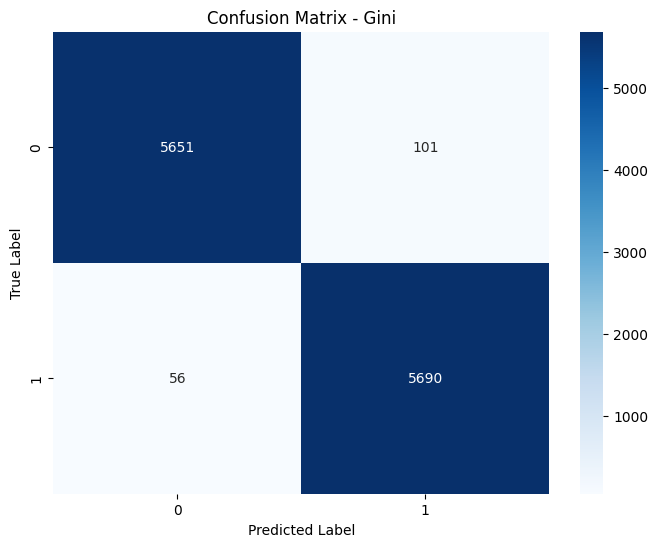


Entropy Results:
CV Score: 0.9909 (+/- 0.0050)

Accuracy Score: 0.9911

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5752
           1       0.99      0.99      0.99      5746

    accuracy                           0.99     11498
   macro avg       0.99      0.99      0.99     11498
weighted avg       0.99      0.99      0.99     11498



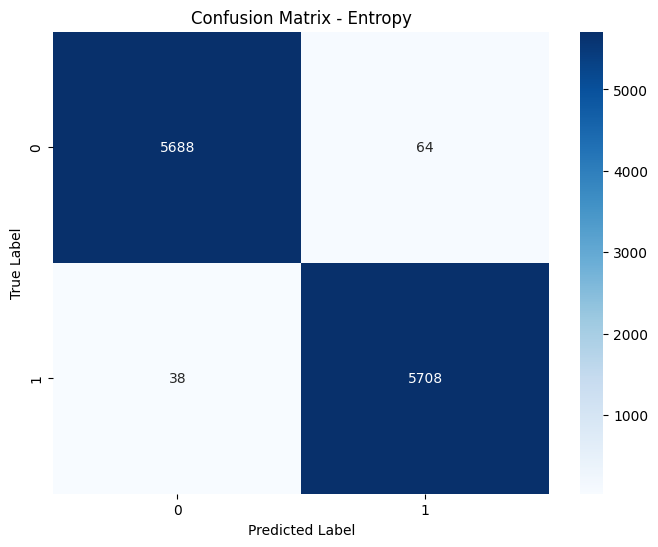


Max Depth Results:
CV Score: 0.9371 (+/- 0.0224)

Accuracy Score: 0.9371

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5752
           1       0.95      0.93      0.94      5746

    accuracy                           0.94     11498
   macro avg       0.94      0.94      0.94     11498
weighted avg       0.94      0.94      0.94     11498



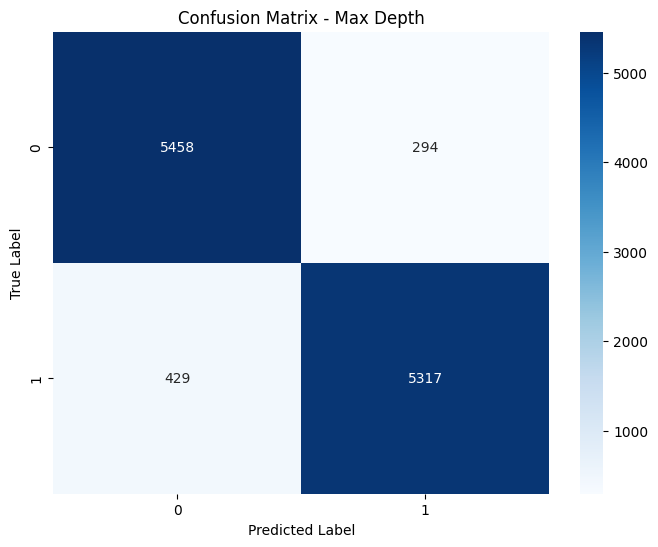

In [385]:


# For each model
models = {
    'Gini': U_decision_tree_gini,
    'Entropy': U_decision_tree_ent,
    'Max Depth': U_decision_tree_depth
}

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"{name} Results:")
    print('='*50)
    
    # Get cross-validation scores
    cv_scores = cross_val_score(model, X_train_U_scaled, y_train_U, cv=5)
    print(f"CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    # Get predictions using cross_val_predict
    y_pred = cross_val_predict(model, X_train_U_scaled, y_train_U, cv=5)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_train_U, y_pred)
    print(f"\nAccuracy Score: {accuracy:.4f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_train_U, y_pred))
    
    # Optional: Add confusion matrix visualization
    cm = confusion_matrix(y_train_U, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Model 3 payment type and high values 



In [386]:
# Filter to keep only TRANSFER and CASH_OUT transactions
filtered_df = df_1[df_1['type'].isin(['TRANSFER', 'CASH_OUT'])]

# Verify the remaining types
print("Remaining transaction types:")
print(filtered_df['type'].value_counts())

# Check the shape of your new dataset
print("\nOriginal dataset shape:", df_1.shape)
print("Filtered dataset shape:", filtered_df.shape)

# Verify unique types and fraud distribution
print("\nUnique types in filtered dataset:")
print(filtered_df['type'].unique())

print("\nFraud distribution in filtered dataset:")
print(filtered_df['isFraud'].value_counts())



Remaining transaction types:
type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

Original dataset shape: (6362620, 12)
Filtered dataset shape: (2770409, 12)

Unique types in filtered dataset:
['TRANSFER' 'CASH_OUT']

Fraud distribution in filtered dataset:
isFraud
0    2762196
1       8213
Name: count, dtype: int64


In [387]:
# Calculate the IQR boundaries for fraudulent transactions
Q1 = fraud_df['amount'].quantile(0.25)
Q3 = fraud_df['amount'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Get outlier transactions
outliers = fraud_df[fraud_df['amount'] > upper_bound].copy()

In [388]:
# Filter for high-value transactions (over 3.6 million) from filtered_df
high_value_df = filtered_df[filtered_df['amount'] >= upper_bound]



In [389]:
# Look at fraudulent outliers
fraudulent_outliers = high_value_df[high_value_df['isFraud'] == 1]
print("\nTotal value of fraudulent outlier transactions: £{:,.2f}".format(fraudulent_outliers['amount'].sum()))


Total value of fraudulent outlier transactions: £7,189,808,209.76


In [390]:
# Look at percentage of total fraud value these outliers represent
total_fraud_value = fraud_df['amount'].sum()
outlier_value = outliers['amount'].sum()
percentage = (outlier_value / total_fraud_value) * 100

print(f"\nOutliers represent {percentage:.2f}% of total fraud value")


Outliers represent 59.63% of total fraud value


In [391]:
# Get the outlier transactions
Q1 = fraud_df['amount'].quantile(0.25)
Q3 = fraud_df['amount'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

outlier_frauds = fraud_df[fraud_df['amount'] > upper_bound].copy()

# Analyze these transactions
print("Analysis of Outlier Fraud Transactions:")
print(f"Number of outlier transactions: {len(fraudulent_outliers)}")
print("\nBasic Statistics of Outlier Amounts:")
print(fraudulent_outliers['amount'].describe())

# Look at patterns
print("\nTransaction Types in Outliers:")
print(fraudulent_outliers['type'].value_counts())

# Check balance changes
print("\nBalance Pattern Analysis:")
print("Number of transactions where:")
print(f"Original balance matches amount: {sum(fraudulent_outliers['oldbalanceOrg'] == fraudulent_outliers['amount'])}")
print(f"New origin balance is 0: {sum(outlier_frauds['newbalanceOrig'] == 0)}")
print(f"Destination balance changes correctly: {sum(fraudulent_outliers['newbalanceDest'] == fraudulent_outliers['oldbalanceDest'] + fraudulent_outliers['amount'])}")

# Time pattern
print("\nTime Distribution:")
print(fraudulent_outliers['step'].describe())

# Check if any were flagged by the system
print("\nFlagged Frauds:")
print(fraudulent_outliers['isFlaggedFraud'].value_counts())

Analysis of Outlier Fraud Transactions:
Number of outlier transactions: 998

Basic Statistics of Outlier Amounts:
count    9.980000e+02
mean     7.204217e+06
std      2.327515e+06
min      3.606943e+06
25%      4.961034e+06
50%      7.178778e+06
75%      1.000000e+07
max      1.000000e+07
Name: amount, dtype: float64

Transaction Types in Outliers:
type
TRANSFER    503
CASH_OUT    495
Name: count, dtype: int64

Balance Pattern Analysis:
Number of transactions where:
Original balance matches amount: 851
New origin balance is 0: 848
Destination balance changes correctly: 391

Time Distribution:
count    998.000000
mean     386.200401
std      209.995529
min        4.000000
25%      212.000000
50%      387.000000
75%      562.000000
max      743.000000
Name: step, dtype: float64

Flagged Frauds:
isFlaggedFraud
0    990
1      8
Name: count, dtype: int64


In [392]:
# Check balance changes
print("\nBalance Pattern Analysis:")
print("Number of transactions where:")
print(f"Original balance matches amount: {sum(fraudulent_outliers['oldbalanceOrg'] == fraudulent_outliers['amount'])}")
print(f"New origin balance is 0: {sum(outlier_frauds['newbalanceOrig'] == 0)}")
print(f"Destination balance changes correctly: {sum(fraudulent_outliers['newbalanceDest'] == fraudulent_outliers['oldbalanceDest'] + fraudulent_outliers['amount'])}")



Balance Pattern Analysis:
Number of transactions where:
Original balance matches amount: 851
New origin balance is 0: 848
Destination balance changes correctly: 391


In [393]:
# Separate TRANSFER and CASH_OUT transactions and create copies
transfers = fraudulent_outliers[fraudulent_outliers['type'] == 'TRANSFER'].copy()
cashouts = fraudulent_outliers[fraudulent_outliers['type'] == 'CASH_OUT'].copy()

print("TRANSFER Transactions Analysis:")
print(f"Number of transfers: {len(transfers)}")

# For transfers: money should move from origin to destination
transfers.loc[:, 'correct_transfer'] = (
    (transfers['oldbalanceOrg'] - transfers['amount'] == transfers['newbalanceOrig']) & 
    (transfers['oldbalanceDest'] + transfers['amount'] == transfers['newbalanceDest'])
)
print(f"Transfers with correct balance flow: {sum(transfers['correct_transfer'])}")

print("\nCASH_OUT Transactions Analysis:")
print(f"Number of cashouts: {len(cashouts)}")

# For cashouts: money should just leave the origin account
cashouts.loc[:, 'correct_cashout'] = (
    cashouts['oldbalanceOrg'] - cashouts['amount'] == cashouts['newbalanceOrig']
)
print(f"Cashouts with correct origin balance reduction: {sum(cashouts['correct_cashout'])}")

# Look at some examples
print("\nSample TRANSFER transaction:")
print(transfers[['amount', 'oldbalanceOrg', 'newbalanceOrig', 
                'oldbalanceDest', 'newbalanceDest']].head(1))

print("\nSample CASH_OUT transaction:")
print(cashouts[['amount', 'oldbalanceOrg', 'newbalanceOrig', 
                'oldbalanceDest', 'newbalanceDest']].head(1))

TRANSFER Transactions Analysis:
Number of transfers: 503
Transfers with correct balance flow: 0

CASH_OUT Transactions Analysis:
Number of cashouts: 495
Cashouts with correct origin balance reduction: 495

Sample TRANSFER transaction:
          amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
4440  10000000.0    12930418.44      2930418.44             0.0   

      newbalanceDest  
4440             0.0  

Sample CASH_OUT transaction:
          amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
4441  10000000.0     10000000.0             0.0             0.0   

      newbalanceDest  
4441      9941904.21  


In [394]:
# Check amounts leaving accounts with a small tolerance for floating point differences
print("Checking amounts leaving accounts (with float precision handling):")

# Create a copy to avoid warnings
fraudulent_outliers = fraudulent_outliers.copy()

# Calculate expected new balance
fraudulent_outliers.loc[:, 'expected_new_balance'] = (
    fraudulent_outliers['oldbalanceOrg'] - fraudulent_outliers['amount']
)

# Check if actual matches expected, allowing for tiny differences
fraudulent_outliers.loc[:, 'balance_matches'] = np.isclose(
    fraudulent_outliers['newbalanceOrig'], 
    fraudulent_outliers['expected_new_balance'],
    rtol=1e-10  # relative tolerance
)

print("\nOverall Summary:")
print(f"Total transactions: {len(fraudulent_outliers)}")
print(f"Transactions where amount reduction matches: {sum(fraudulent_outliers['balance_matches'])}")

# Break down by transaction type
print("\nBy Transaction Type:")
print(fraudulent_outliers.groupby(['type', 'balance_matches']).size())

# Look at actual differences
print("\nChecking actual differences:")
mismatched = fraudulent_outliers[~fraudulent_outliers['balance_matches']].copy()
if len(mismatched) > 0:
    mismatched.loc[:, 'actual_difference'] = (
        mismatched['newbalanceOrig'] - mismatched['expected_new_balance']
    )
    print(mismatched[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 
                      'expected_new_balance', 'actual_difference']].head())

Checking amounts leaving accounts (with float precision handling):

Overall Summary:
Total transactions: 998
Transactions where amount reduction matches: 990

By Transaction Type:
type      balance_matches
CASH_OUT  True               495
TRANSFER  False                8
          True               495
dtype: int64

Checking actual differences:
             type       amount  oldbalanceOrg  newbalanceOrig  \
2736446  TRANSFER   4953893.08     4953893.08      4953893.08   
5563713  TRANSFER   4892193.09     4892193.09      4892193.09   
5996407  TRANSFER  10000000.00    19585040.37     19585040.37   
5996409  TRANSFER   9585040.37    19585040.37     19585040.37   
6281482  TRANSFER  10000000.00    10399045.08     10399045.08   

         expected_new_balance  actual_difference  
2736446                  0.00         4953893.08  
5563713                  0.00         4892193.09  
5996407            9585040.37        10000000.00  
5996409           10000000.00         9585040.37  
628148

In [395]:
# Look at the 8 mismatched transactions and their flagged status
mismatched = fraudulent_outliers[~fraudulent_outliers['balance_matches']].copy() 
mismatched['actual_difference'] = mismatched['newbalanceOrig'] - mismatched['expected_new_balance']

print("Analysis of 8 Mismatched Transactions:")
print("\nFlagged Status:")
print(mismatched['isFlaggedFraud'].value_counts())

print("\nDetailed view of mismatched transactions:")
print(mismatched[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 
                  'expected_new_balance', 'isFlaggedFraud']].sort_values('isFlaggedFraud'))

# Compare with all flagged transactions in outliers
print("\nTotal Flagged Transactions in Outliers:")
print(fraudulent_outliers['isFlaggedFraud'].value_counts())

# Show overlap between mismatched and flagged
print("\nOverlap between mismatched and flagged transactions:")
flagged_and_mismatched = len(mismatched[mismatched['isFlaggedFraud'] == 1])
print(f"Number of transactions that are both mismatched and flagged: {flagged_and_mismatched}")

Analysis of 8 Mismatched Transactions:

Flagged Status:
isFlaggedFraud
1    8
Name: count, dtype: int64

Detailed view of mismatched transactions:
             type       amount  oldbalanceOrg  newbalanceOrig  \
2736446  TRANSFER   4953893.08     4953893.08      4953893.08   
5563713  TRANSFER   4892193.09     4892193.09      4892193.09   
5996407  TRANSFER  10000000.00    19585040.37     19585040.37   
5996409  TRANSFER   9585040.37    19585040.37     19585040.37   
6281482  TRANSFER  10000000.00    10399045.08     10399045.08   
6362460  TRANSFER  10000000.00    17316255.05     17316255.05   
6362462  TRANSFER   7316255.05    17316255.05     17316255.05   
6362584  TRANSFER   5674547.89     5674547.89      5674547.89   

         expected_new_balance  isFlaggedFraud  
2736446                  0.00               1  
5563713                  0.00               1  
5996407            9585040.37               1  
5996409           10000000.00               1  
6281482             399045.

In [396]:
high_value_df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_enc
count,17223.000000,1.722300e+04,1.722300e+04,1.722300e+04,1.722300e+04,1.722300e+04,17223.000000,17223.000000,17223.000000
mean,331.140568,8.403589e+06,5.364447e+05,9.098322e+04,1.189871e+07,2.207029e+07,0.057946,0.000464,3.913778
std,88.734930,6.347883e+06,2.563081e+06,1.361161e+06,2.017856e+07,2.557383e+07,0.233648,0.021548,0.501245
min,1.000000,3.603906e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000
25%,304.000000,4.509252e+06,0.000000e+00,0.000000e+00,2.840189e+05,8.384593e+06,0.000000,0.000000,4.000000
50%,322.000000,6.617464e+06,0.000000e+00,0.000000e+00,7.010829e+06,1.452017e+07,0.000000,0.000000,4.000000
75%,348.000000,1.000000e+07,3.046550e+04,0.000000e+00,1.322446e+07,2.607277e+07,0.000000,0.000000,4.000000
max,743.000000,9.244552e+07,5.958504e+07,4.958504e+07,3.249151e+08,3.555534e+08,1.000000,1.000000,4.000000


In [397]:
high_value_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17223 entries, 1153 to 6362617
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            17223 non-null  int64  
 1   type            17223 non-null  object 
 2   amount          17223 non-null  float64
 3   nameOrig        17223 non-null  object 
 4   oldbalanceOrg   17223 non-null  float64
 5   newbalanceOrig  17223 non-null  float64
 6   nameDest        17223 non-null  object 
 7   oldbalanceDest  17223 non-null  float64
 8   newbalanceDest  17223 non-null  float64
 9   isFraud         17223 non-null  int64  
 10  isFlaggedFraud  17223 non-null  int64  
 11  type_enc        17223 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 1.7+ MB


In [398]:
# Create the independent and dependent variables
X = high_value_df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'type_enc']]
y = high_value_df['isFraud']

In [399]:
# Split the data first
X_train_O, X_test_O, y_train_O, y_test_O = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# display the shapes of the resulting datasets
print(f'X_train shape: {X_train_O.shape}')
print(f'X_test shape: {X_test_O.shape}')
print(f'y_train shape: {y_train_O.shape}')
print(f'y_test shape: {y_test_O.shape}')

X_train shape: (12056, 6)
X_test shape: (5167, 6)
y_train shape: (12056,)
y_test shape: (5167,)


In [400]:
## Let's scale our data
# Create scaler
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled_O = scaler.fit_transform(X_train_O)

# Only transform test data (using the same scaler)
X_test_scaled_O = scaler.transform(X_test_O)

In [401]:
## creating a decision tree classifier on the undersampled dataset
O_decision_tree_gini = DecisionTreeClassifier()

## using entropy criterion
O_decision_tree_ent = DecisionTreeClassifier(criterion='entropy')

## use a max depth
O_decision_tree_depth = DecisionTreeClassifier(max_depth=3)

In [402]:

# fit the trees
O_decision_tree_gini.fit(X_train_scaled_O,y_train_O)
O_decision_tree_ent.fit(X_train_scaled_O,y_train_O)
O_decision_tree_depth.fit(X_train_scaled_O, y_train_O)

DecisionTreeClassifier(max_depth=3)

In [403]:
## make prediction for test data
y_pred_gini_O = O_decision_tree_gini.predict(X_test_scaled_O)
y_pred_ent_O = O_decision_tree_ent.predict(X_test_scaled_O)
y_pred_depth_O = O_decision_tree_depth.predict(X_test_scaled_O)


Gini Results:
CV Score: 0.9999 (+/- 0.0003)

Accuracy Score: 0.9998

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11357
           1       1.00      1.00      1.00       699

    accuracy                           1.00     12056
   macro avg       1.00      1.00      1.00     12056
weighted avg       1.00      1.00      1.00     12056



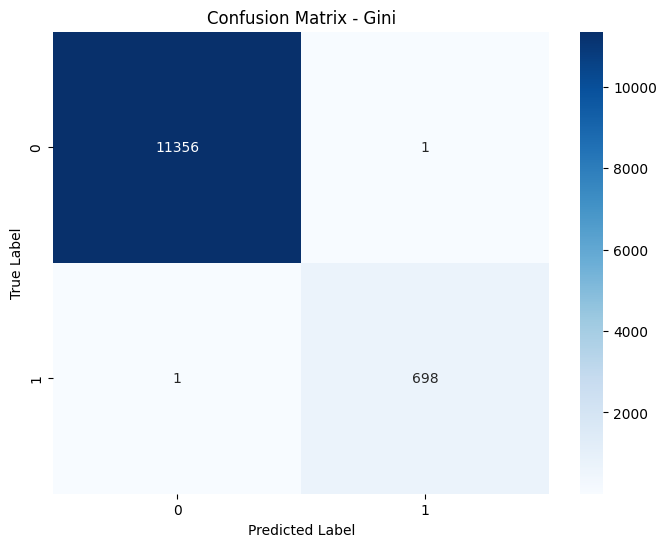


Entropy Results:
CV Score: 0.9999 (+/- 0.0003)

Accuracy Score: 0.9999

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11357
           1       1.00      1.00      1.00       699

    accuracy                           1.00     12056
   macro avg       1.00      1.00      1.00     12056
weighted avg       1.00      1.00      1.00     12056



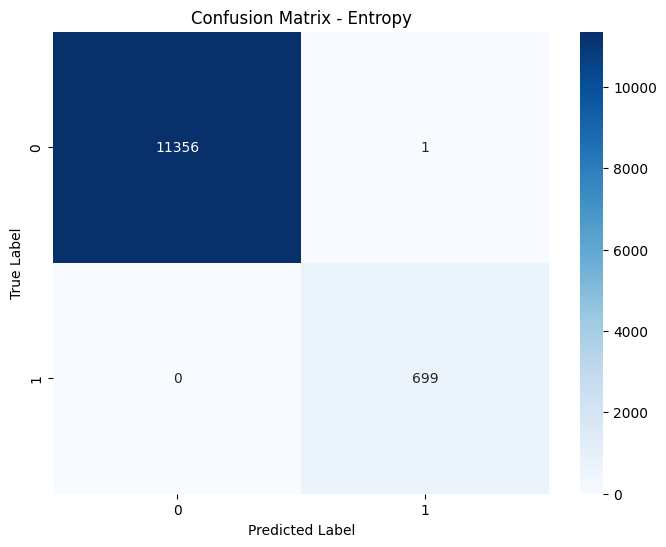


Max Depth Results:
CV Score: 0.9999 (+/- 0.0003)

Accuracy Score: 0.9999

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11357
           1       1.00      1.00      1.00       699

    accuracy                           1.00     12056
   macro avg       1.00      1.00      1.00     12056
weighted avg       1.00      1.00      1.00     12056



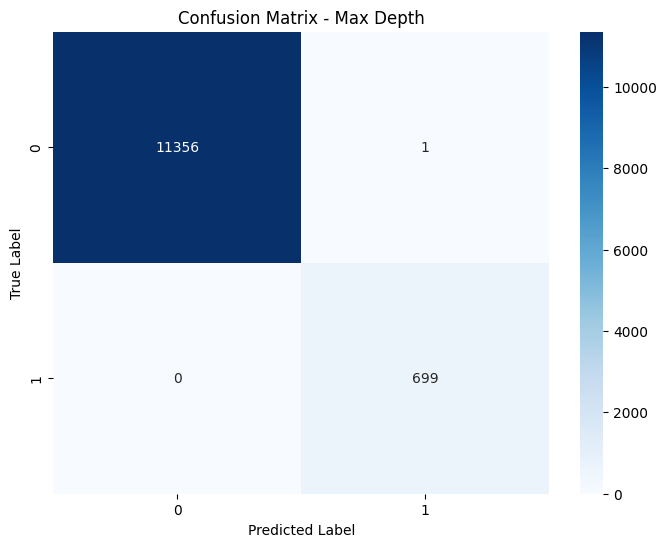

In [404]:
# For each model
models = {
    'Gini': O_decision_tree_gini,
    'Entropy': O_decision_tree_ent,
    'Max Depth': O_decision_tree_depth
}

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"{name} Results:")
    print('='*50)
    
    # Get cross-validation scores
    cv_scores = cross_val_score(model, X_train_scaled_O, y_train_O, cv=5)
    print(f"CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    # Get predictions using cross_val_predict
    y_pred = cross_val_predict(model, X_train_scaled_O, y_train_O, cv=5)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_train_O, y_pred)
    print(f"\nAccuracy Score: {accuracy:.4f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_train_O, y_pred))
    
    # Optional: Add confusion matrix visualization
    cm = confusion_matrix(y_train_O, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [405]:


# Try different k-fold sizes
for k in [5, 10, 15]:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train_scaled_O, y_train_O, cv=kf)
    print(f"\n{k}-Fold CV Scores:")
    print(f"Mean: {cv_scores.mean():.4f}")
    print(f"Std: {cv_scores.std():.4f}")


5-Fold CV Scores:
Mean: 0.9998
Std: 0.0003

10-Fold CV Scores:
Mean: 0.9999
Std: 0.0002

15-Fold CV Scores:
Mean: 0.9998
Std: 0.0004


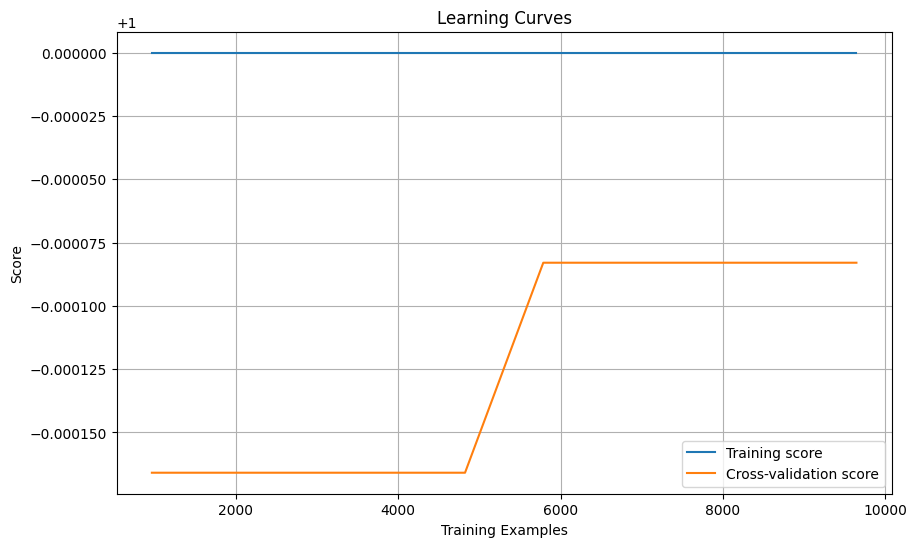

In [406]:


# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_scaled_O, y_train_O, 
    cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [407]:
## svm
clflinear = svm.SVC(kernel='linear')
clfsigmoid = svm.SVC(kernel = 'sigmoid')
clfrbf = svm.SVC(kernel ='rbf')

In [408]:
##train model
clflinear.fit(X_train_scaled_O,y_train_O)
clfsigmoid.fit(X_train_scaled_O,y_train_O)
clfrbf.fit(X_train_scaled_O, y_train_O)

SVC()

In [ ]:
## prediction
y_pred_lin = clflinear.predict(X_test_scaled_O)
y_pred_sig =clfsigmoid.predict(X_test_scaled_O)
y_pred_rbf = clfrbf.predict(X_test_scaled_O)


CLF Linear Results:
CV Score: 0.9998 (+/- 0.0004)

Accuracy Score: 0.9998

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11357
           1       1.00      1.00      1.00       699

    accuracy                           1.00     12056
   macro avg       1.00      1.00      1.00     12056
weighted avg       1.00      1.00      1.00     12056


CLF Sigmoid Results:
CV Score: 0.9998 (+/- 0.0007)

Accuracy Score: 0.9998

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11357
           1       1.00      1.00      1.00       699

    accuracy                           1.00     12056
   macro avg       1.00      1.00      1.00     12056
weighted avg       1.00      1.00      1.00     12056


CLF RBF Results:
CV Score: 0.9998 (+/- 0.0004)

Accuracy Score: 0.9998

Classification Report:
              precision    recall  f1-score   suppo

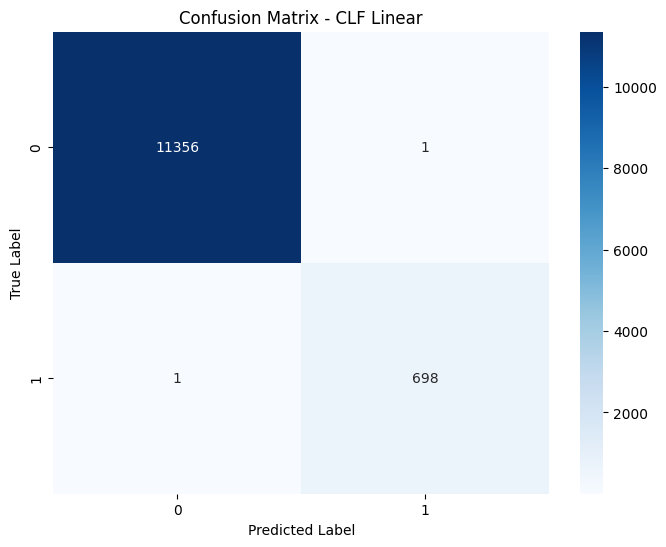

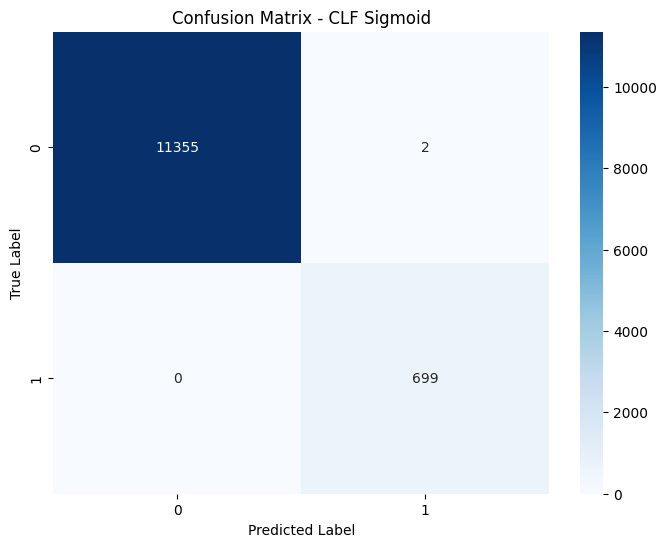

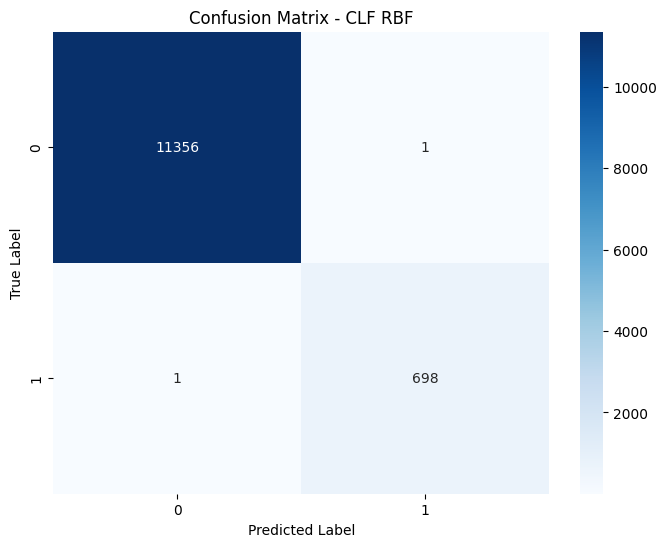

In [410]:
# For each model
models = {
     'CLF Linear':clflinear,
    'CLF Sigmoid' : clfsigmoid,
    'CLF RBF':clfrbf
}

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"{name} Results:")
    print('='*50)
    
    # Get cross-validation scores
    cv_scores = cross_val_score(model, X_train_scaled_O, y_train_O, cv=5)
    print(f"CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    # Get predictions using cross_val_predict
    y_pred = cross_val_predict(model, X_train_scaled_O, y_train_O, cv=5)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_train_O, y_pred)
    print(f"\nAccuracy Score: {accuracy:.4f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_train_O, y_pred))
    
    # Optional: Add confusion matrix visualization
    cm = confusion_matrix(y_train_O, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')